# Analysis of the first round of the 2016 Bulgarian presidential elections

## Part III - Analysis

After scraping the data for each voting section oustide Bulgaria and pre-processing the data for analysis, we will delve in and examine the data, both in aggregate and by section. 

As discussed in Part I, among the 21 presidential candidates, only 6 gathered more than 4% of the vote and we limit the analysis to these six candidates. They can be described as follows:

* Traicho Traikov (TT) - a pro-Western, anti-corruption technocrat 
* Rumen Radev (RR) - a pro-Russian airforce general
* Cecka Caceva (CC) - the status quo candidate, balancing between the West and Russia
* Krassimir Karakachanov (KK) - a pro-Russian far-right nationalist
* Vesselin Mareshki (VM) - a local oligarch and independent candidate
* Plamen Oresharski (PO) - representing the Turkish minority party and widely perceived as just another candidate of the oligarchy

People were also allowed to check a box indicating that they do not support any of the candidates, which represented the protest vote. Therefore, we also collected information on the number of protest votes abroad.


In [14]:
setwd("C:/Users/grozeve/Documents/_9_Misc/DataScience/My projects/bg_election")
ballots.df <- read.csv("ballots.csv", stringsAsFactor=FALSE)
str(ballots.df)
dim(ballots.df)

'data.frame':	325 obs. of  33 variables:
 $ X           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ section.id  : int  320100003 320100001 320100004 320100005 320100002 320200012 320200006 320200007 320200013 320200302 ...
 $ country     : chr  "Australia" "Australia" "Australia" "Australia" ...
 $ city        : chr  "Brisbane" "Canberra" "Melbourne" "Perth" ...
 $ valid       : int  45 40 115 81 148 122 608 761 558 505 ...
 $ protest     : int  2 1 3 9 8 13 32 61 35 30 ...
 $ tt          : int  14 3 45 30 60 23 149 243 177 154 ...
 $ rr          : int  13 17 13 11 22 19 100 141 112 89 ...
 $ cc          : int  4 11 24 11 16 24 112 107 75 77 ...
 $ kk          : int  7 0 22 7 10 14 71 82 66 72 ...
 $ vm          : int  4 1 1 2 8 19 51 43 28 28 ...
 $ po          : int  0 0 0 0 1 0 20 11 4 7 ...
 $ valid.net   : int  43 39 112 72 140 109 576 700 523 475 ...
 $ tt.perc     : num  0.3256 0.0769 0.4018 0.4167 0.4286 ...
 $ rr.perc     : num  0.302 0.436 0.116 0.153 0.157 ...
 $ cc.perc     : num  0

[1] 325  33

In [15]:
# The rank variables seem to have been duplicated, so we will delete them.
ballots.df <- ballots.df[ , -c(28:33)]
head(ballots.df)

,X,section.id,country,city,valid,protest,tt,rr,cc,kk,...,vm.perc,po.perc,top6.ballots,top6.perc,tt.rank,rr.rank,cc.rank,kk.rank,vm.rank,po.rank
1,1,320100003,Australia,Brisbane,45,2,14,13,4,7,...,0.0930232558139535,0,42,0.933333333333333,1,2,4,3,4,6
2,2,320100001,Australia,Canberra,40,1,3,17,11,0,...,0.0256410256410256,0,32,0.8,3,1,2,5,4,5
3,3,320100004,Australia,Melbourne,115,3,45,13,24,22,...,0.00892857142857143,0,105,0.91304347826087,1,4,2,3,5,6
4,4,320100005,Australia,Perth,81,9,30,11,11,7,...,0.0277777777777778,0,61,0.753086419753086,1,2,2,4,5,6
5,5,320100002,Australia,Sidney,148,8,60,22,16,10,...,0.0571428571428571,0.00714285714285714,117,0.790540540540541,1,2,3,4,5,6
6,6,320200012,Austria,Bregenz,122,13,23,19,24,14,...,0.174311926605505,0,99,0.811475409836066,2,3,1,5,3,6


### Aggregate voting results outside Bulgaria - the Turkey effect
We will first look the aggregate votes collected by each Top 6 candidate. We will also calculate these results by excluding votes cast in Turkey for two reasons: 1) Bulgarian citizens living in Turkey tend to vote for the Turkish minority party, which makes these votes less informative; and 2) they represent a large portion of the total number of votes outside Bulgaria and can skew the results. Let's see how large this portion is:

In [4]:
# Total number of votes cast outside Bulgaria
sum(ballots.df[ ,5])

[1] 110566

In [18]:
# Total number of votes cast outside Bulgaria, but excluding Turkey
sum(ballots.df[which(ballots.df$country!="Turkey"),5])

# Share of ballots cast in Turkey over all ballots cast outside Bulgaria
sum(ballots.df[which(ballots.df$country=="Turkey"),5])/sum(ballots.df[ ,5])

[1] 80938

[1] 0.2679666

As shown above, votes cast in Turkey amount to close to 30,000, or roughly 1 in 4 votes outside of Bulgaria. This is a significant share of the total vote.

We will further show that the voting results vary significantly between Turkey and the rest of the foreign voting locations.

In [19]:
# Aggregate votes from all sections outside Bulgaria, including those in Turkey
aggr.all <- colSums(ballots.df[ , 7:12])
aggr.all

tt    rr    cc    kk    vm    po 
14560 18138 27552 12185  6709 15654

In [7]:
# Aggregate votes from sections in Turkey alone
aggr.Turkey <- colSums(ballots.df[which(ballots.df$country=="Turkey"), 7:12])
aggr.Turkey

tt    rr    cc    kk    vm    po 
  201   337 12525    64   322 14993

In [8]:
aggr.Turkey/aggr.all

tt          rr          cc          kk          vm          po 
0.013804945 0.018579777 0.454594948 0.005252359 0.047995230 0.957774371

Over 95% of the votes for the candidate of the Turkish minority candidate (PO) and  over 45% of the votes for the "status quo" candidate (CC) come from the votes cast in Turkey. 

Or, represented visualy:

,outsideTurkey,Turkey,candidate
tt,14359,201,tt
rr,17801,337,rr
cc,15027,12525,cc
kk,12121,64,kk
vm,6387,322,vm
po,661,14993,po


,candidate,region,votes
1,tt,outsideTurkey,14359
2,rr,outsideTurkey,17801
3,cc,outsideTurkey,15027
4,kk,outsideTurkey,12121
5,vm,outsideTurkey,6387
6,po,outsideTurkey,661
7,tt,Turkey,201
8,rr,Turkey,337
9,cc,Turkey,12525
10,kk,Turkey,64


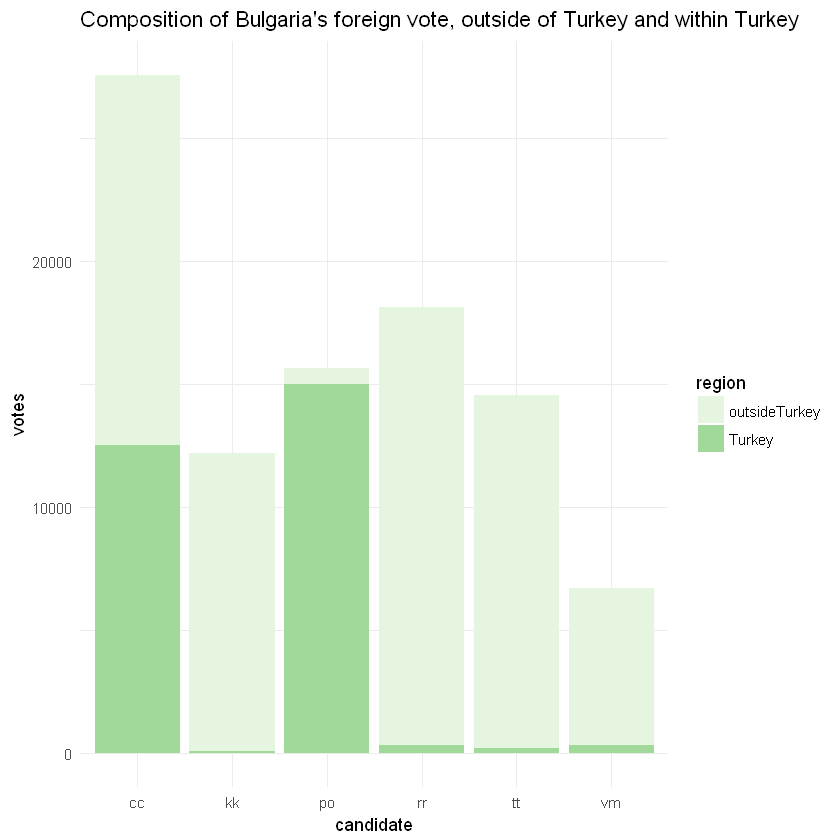

In [37]:
# To work with ggplot2 we will create a dataframe with the aggregate results outside of Turkey and within Turkey
turkey_effect.df <- data.frame(aggr.all - aggr.Turkey, aggr.Turkey)
turkey_effect.df$candidate <- row.names(turkey_effect.df)
colnames(turkey_effect.df)[1:2] <- c("outsideTurkey", "Turkey")
turkey_effect.df

# Reshape to a "tidy" format for use with ggplot
#install.packages("reshape2", repos="https://cran.r-project.org")
require(reshape2)
turkey_effect.df <- melt(turkey_effect.df, id.vars="candidate", variable.name="region", value.name="votes")
turkey_effect.df

# Plot a comparison of the distribution of votes from outside Turkey and within Turkey
#install.packages("ggplot2", repos="https://cran.r-project.org")

require(ggplot2)
ggplot(data=turkey_effect.df, aes(x=candidate, y=votes, fill=region))+
            geom_bar(stat="identity") + 
            scale_fill_brewer(palette="Greens")+theme_minimal() +
            labs(title="Composition of Bulgaria's foreign vote, outside of Turkey and within Turkey")



### Aggregate voting results outside Bulgaria, excluding Turkey

Given the systematic differences in voting patterns within Turkey and outside Turkey, we will exclude these votes from the analysis to avoid skewing the overall results. 

In [10]:
# Limit the source dataframe to all voting sections outside Bulgaria, except sections in Turkey. 
ballots.woT <- ballots.df[which(ballots.df$country!="Turkey"), ]
str(ballots.woT)

'data.frame':	290 obs. of  27 variables:
 $ X           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ section.id  : int  320100003 320100001 320100004 320100005 320100002 320200012 320200006 320200007 320200013 320200302 ...
 $ country     : chr  "Australia" "Australia" "Australia" "Australia" ...
 $ city        : chr  "Brisbane" "Canberra" "Melbourne" "Perth" ...
 $ valid       : int  45 40 115 81 148 122 608 761 558 505 ...
 $ protest     : int  2 1 3 9 8 13 32 61 35 30 ...
 $ tt          : int  14 3 45 30 60 23 149 243 177 154 ...
 $ rr          : int  13 17 13 11 22 19 100 141 112 89 ...
 $ cc          : int  4 11 24 11 16 24 112 107 75 77 ...
 $ kk          : int  7 0 22 7 10 14 71 82 66 72 ...
 $ vm          : int  4 1 1 2 8 19 51 43 28 28 ...
 $ po          : int  0 0 0 0 1 0 20 11 4 7 ...
 $ valid.net   : int  43 39 112 72 140 109 576 700 523 475 ...
 $ tt.perc     : num  0.3256 0.0769 0.4018 0.4167 0.4286 ...
 $ rr.perc     : num  0.302 0.436 0.116 0.153 0.157 ...
 $ cc.perc     : num  0

In [92]:
# Tabular representation of votes outside Bulgaria after excluding Turkey from the analysis
aggr.woT <- turkey_effect.df[1:6,]

# Number of votes cast outside Bulgaria after excluding Turkey
num_votes.woT <- colSums(aggr.woT[3])
paste("Total number of votes cast outside Bulgaria, excluding Turkey: ", num_votes.woT)

# Calculate percentage results
aggr.woT$votes_perc <- aggr.woT$votes/num_votes.woT
aggr.woT


[1] "Total number of votes cast outside Bulgaria, excluding Turkey:  66356"

,candidate,region,votes,votes_perc
1,tt,outsideTurkey,14359,0.21639339321237
2,rr,outsideTurkey,17801,0.268265115437941
3,cc,outsideTurkey,15027,0.2264603050214
4,kk,outsideTurkey,12121,0.182666224606667
5,vm,outsideTurkey,6387,0.0962535415034059
6,po,outsideTurkey,661,0.00996142021821689


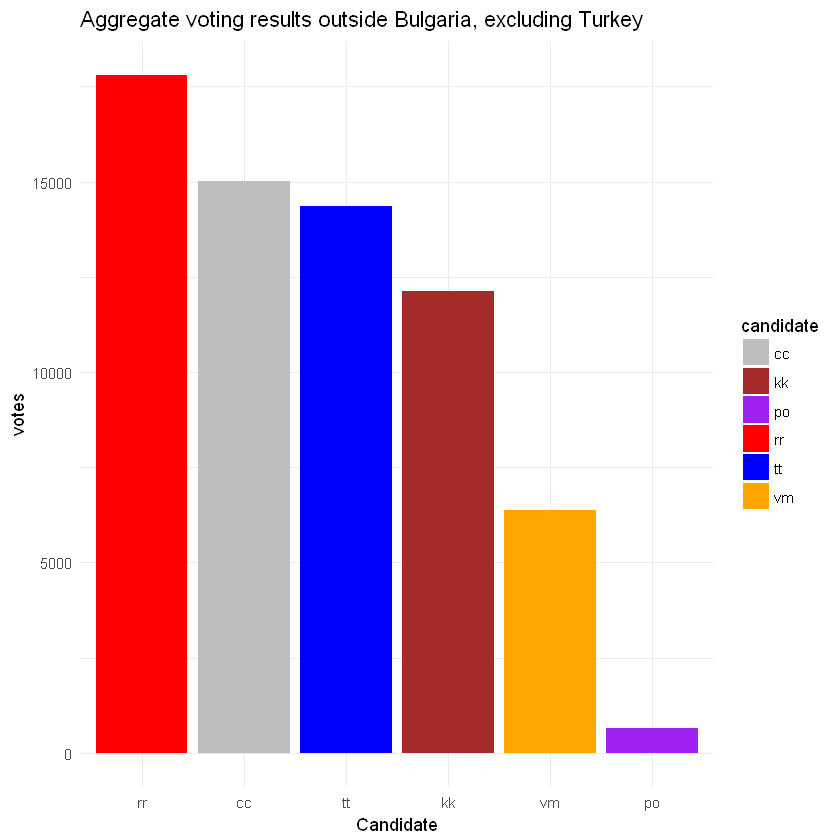

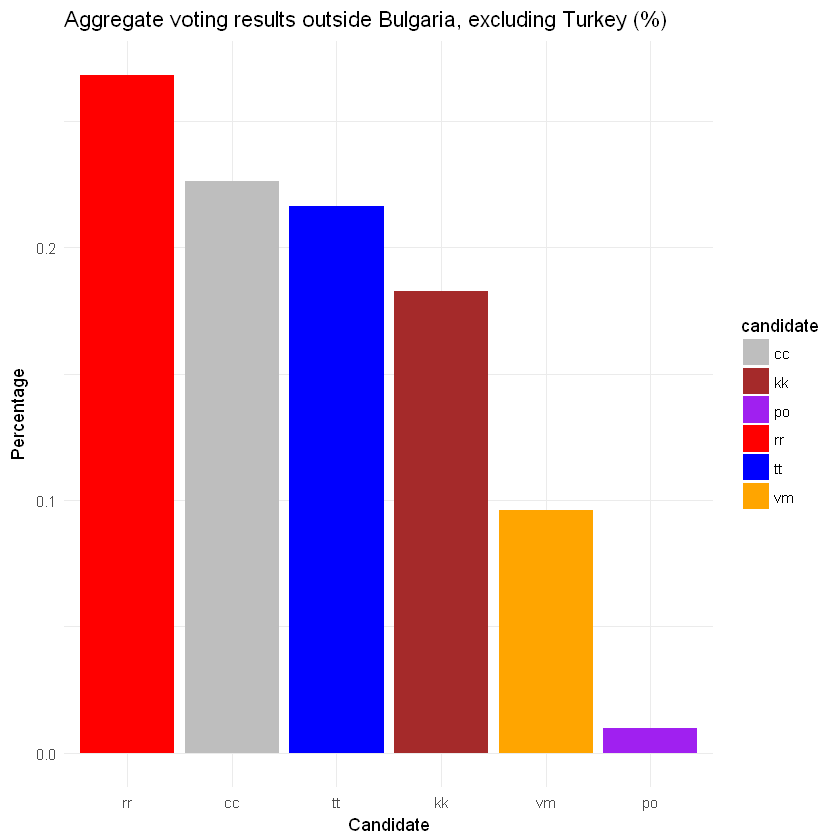

In [97]:
# Bar plot - number of votes
# Color code the bars by the colors of the nominating parties
ggplot(aggr.woT, aes(y=votes, x=reorder(candidate, -votes), fill=candidate)) +
   geom_bar(stat="identity") + 
            scale_fill_manual(values=c('grey', 'brown', 'purple', 'red', 'blue', 'orange'))+theme_minimal() +
            labs(title="Aggregate voting results outside Bulgaria, excluding Turkey", x="Candidate")

ggplot(aggr.woT, aes(y=votes_perc, x=reorder(candidate, -votes_perc), fill=candidate)) +
   geom_bar(stat="identity") + 
            scale_fill_manual(values=c('grey', 'brown', 'purple', 'red', 'blue', 'orange'))+theme_minimal() +
            labs(title="Aggregate voting results outside Bulgaria, excluding Turkey (%) ", x="Candidate", y="Percentage")


How do these results compare to the results based on votes from Bulgaria? 

We will manually enter the domestic results (source: https://results.cik.bg/pvrnr2016/tur1/president/index.html).

In [128]:
# Results for the top 6 candidates in percentage based on total votes cast (within Bulgaria and abroad)
candidate <- aggr.woT$candidate
votes_perc <- c(0.0587, 0.2544, 0.2196, 0.1497, 0.1117, 0.0663)
region <- rep("Domestic", 6)
dom_perc.df <- data.frame(candidate, region, votes_perc)

aggr_all.df <- rbind(dom_perc.df, aggr.woT[ , c(1,2,4)])

# For clarity in this use case, will replace "outsideTurkey" with "Abroad"
levels(aggr_all.df$region) <- c(levels(aggr_all.df$region), "Abroad")
aggr_all.df$region[aggr_all.df$region == "outsideTurkey"] <- "Abroad"
aggr_all.df


,candidate,region,votes_perc
1,tt,Domestic,0.0587
2,rr,Domestic,0.2544
3,cc,Domestic,0.2196
4,kk,Domestic,0.1497
5,vm,Domestic,0.1117
6,po,Domestic,0.0663
7,tt,Abroad,0.21639339321237
8,rr,Abroad,0.268265115437941
9,cc,Abroad,0.2264603050214
10,kk,Abroad,0.182666224606667


Saving 7 x 7 in image


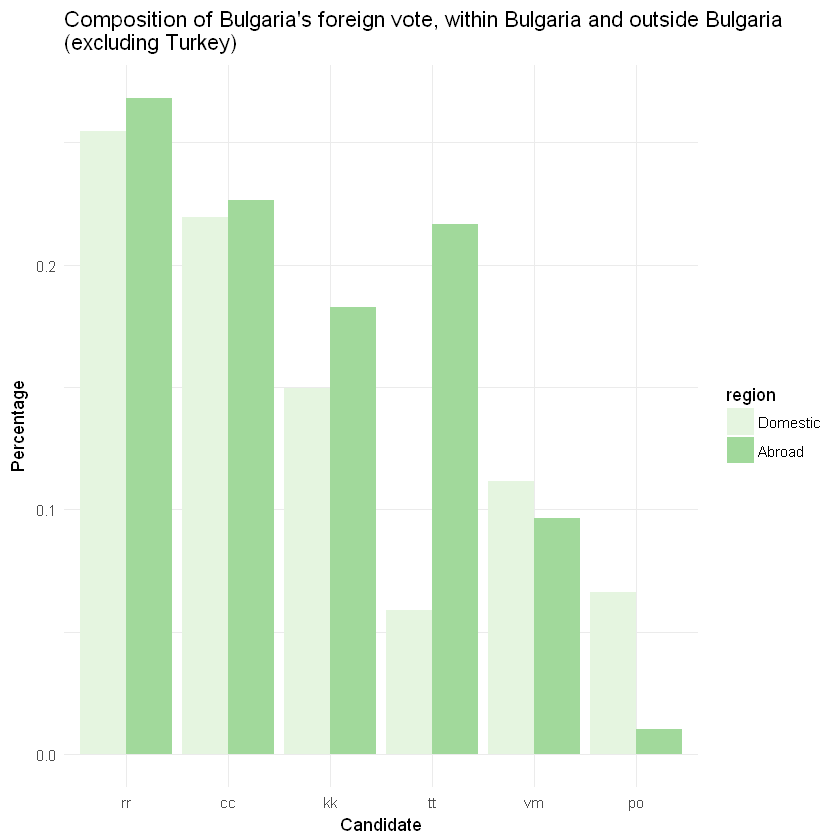

In [141]:
# Side-by-side bar plot of results from outside Bulgaria and results within Bulgaria. 

ggplot(aggr_all.df, aes(y=votes_perc, x=reorder(candidate, -votes_perc), fill=region)) +
   geom_bar(stat="identity", position=position_dodge()) +
   scale_fill_brewer(palette="Greens")+theme_minimal() +
   labs(title="Composition of Bulgaria's foreign vote, within Bulgaria and outside Bulgaria \n(excluding Turkey)",
       x = "Candidate", y="Percentage")   

ggsave("ForeignDomestic.pdf")

The bar plot above shows that the biggest disparity between the domestic and foreign vote is in the result of the pro-Western candidate, who did much better outside Bulgaria.

### Aggregate results by region: Western Europe

Since TT is the only Pro-Western candidate, we would like to examine whether he would perform best among Bulgarian immigrants living in the US and Canada, as well as Western Europe. A potential motivation for this hypothesis is that the choice of destination country reveals the immigrant's preferences for the kind of economic and political environment they would like to live in. An alternative motivation is the possibility that an immigrant's political preferences are influenced by the local news media of the destination country. These are just examples of possible linkages and there can certainly be a lot more nuance in the processes that lead to this hypothesis. 

Let's look at Western Europe first. We introduce an admittedly ad hoc definition of Western Europe - we exclude former Communist countries, except Slovenia, Slovakia and Poland. The motivation for this definition of "Western Europe" was to capture only countries that are associated with the traditional understanding of liberal democracies. One can also check that the result does not change significantly regardless of whether Slovenia, Slovakia or Poland are included. 

[1] "Total number of votes cast in Western Europe: 50860"

[1] "Share of votes cast in Western Europe over all votes outside Bulgaria and Turkey:  76.6%"

,votes,candidate,votes_perc
tt,10939,tt,0.215080613448683
rr,13231,rr,0.260145497443964
cc,11272,cc,0.221627998427055
kk,9403,kk,0.184880062917814
vm,5440,vm,0.106960283130161
po,575,po,0.011305544632324


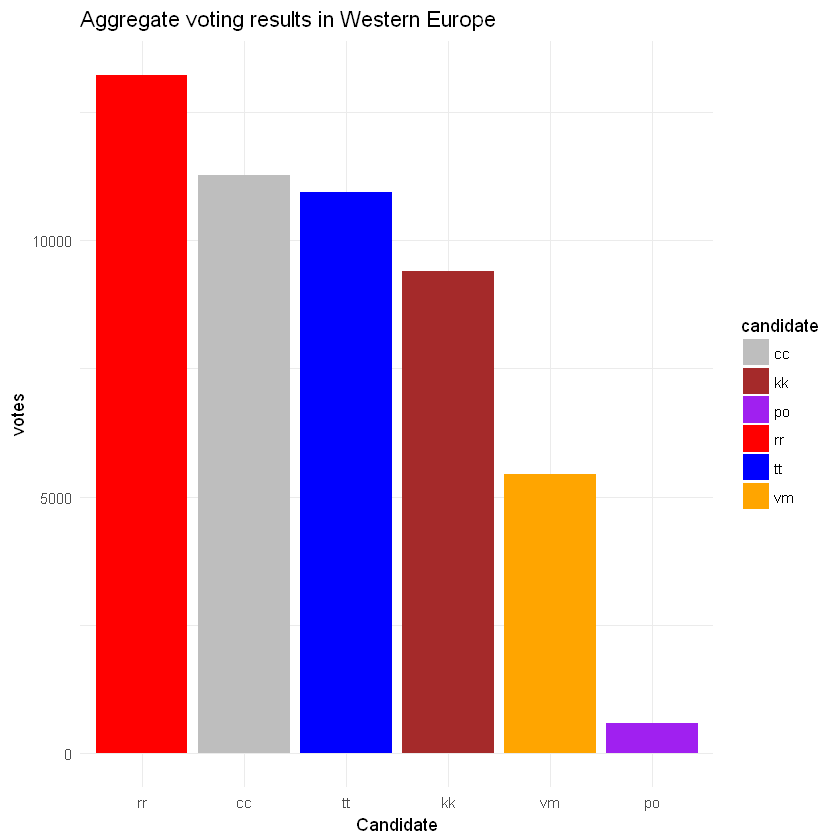

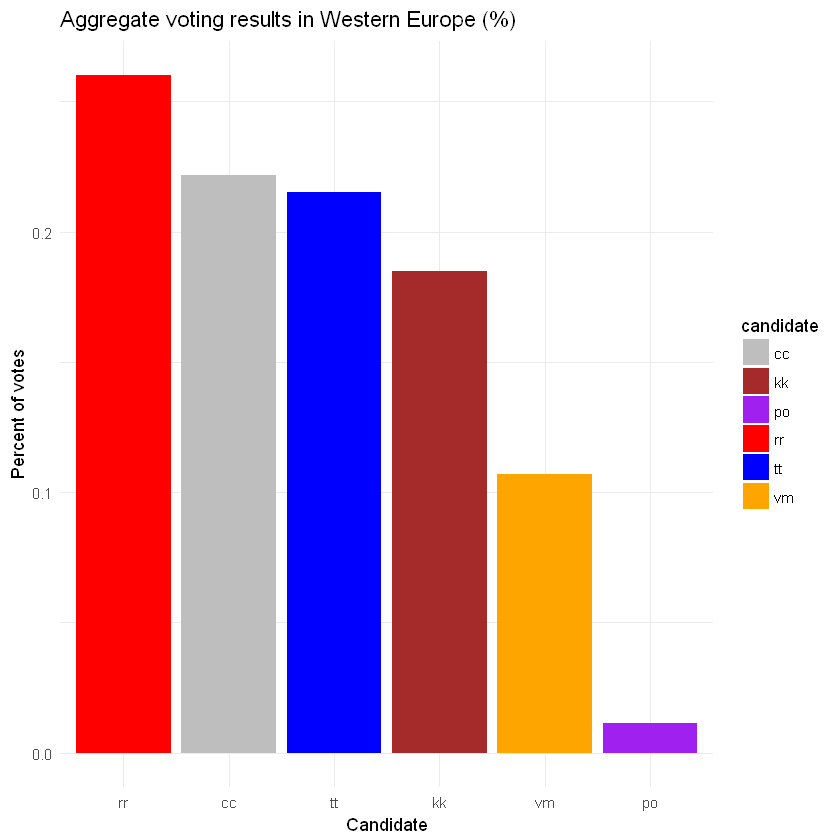

In [74]:
# Limit the results to Europe
EU <- c('Austria','Belgium','UK','Greece','Denmark','Ireland','Spain','Italy','Lithuania','Luxemburg','Malta')
EU <- c(EU,'Netherlands','Norway','Poland','Portugal','Slovakia','Slovenia','Hungary','Finland','Germany','France')
EU <- c(EU, 'Switzerland', 'Sweden')

EU.result <- as.data.frame(colSums(ballots.df[which(ballots.df$country %in% EU), 7:12]))
EU.result$Candidate <- rownames(EU.result)
colnames(EU.result) <- c("votes", "candidate")

# Number of votes cast in Western Europe
num_votes.EU <- colSums(EU.result[1])
paste0("Total number of votes cast in Western Europe: ", num_votes.EU)

# Percent of votes cast in Western Europe over all votes outside Bulgaria and Turkey
perc_EU.woT <- sprintf("%.1f%%", (num_votes.EU/num_votes.woT)*100)
paste("Share of votes cast in Western Europe over all votes outside Bulgaria and Turkey: ", perc_EU.woT)

# Calculate percentage results
EU.result$votes_perc <- EU.result$votes/num_votes.EU
EU.result

# Bar plot - number of votes
ggplot(EU.result, aes(y=votes, x=reorder(candidate, -votes), fill=candidate)) +
   geom_bar(stat="identity") + 
   scale_fill_manual(values=c('grey', 'brown', 'purple', 'red', 'blue', 'orange'))+theme_minimal() +
   labs(title="Aggregate voting results in Western Europe", x="Candidate")

# Bar plot - percentage of votes within Western Europe
ggplot(EU.result, aes(y=votes_perc, x=reorder(candidate, -votes_perc), fill=candidate)) +
   geom_bar(stat="identity") + 
   scale_fill_manual(values=c('grey', 'brown', 'purple', 'red', 'blue', 'orange'))+theme_minimal() +
   labs(title="Aggregate voting results in Western Europe (%)", x="Candidate", y="Percent of votes")

As we can see, the majority of the votes cast outside Bulgaria and Turkey were cast in Western Europe and unsurprisingly the pattern of the results from Western Europe dominate the aggregate pattern of results. 

Next, we will see if this pattern persists among North America votes.

### Aggregate results by region: North America

We define North America as US and Canada. 

[1] "Total number of votes cast in North America: 8267"

[1] "Share of votes cast in North America over all votes outside Bulgaria and Turkey:  12.5%"

,votes,candidate,votes_perc
tt,2226,tt,0.2692633361558
rr,2620,rr,0.316922704729648
cc,1847,cc,0.223418410547962
kk,1132,kk,0.136929962501512
vm,409,vm,0.0494738115398573
po,33,po,0.00399177452522076


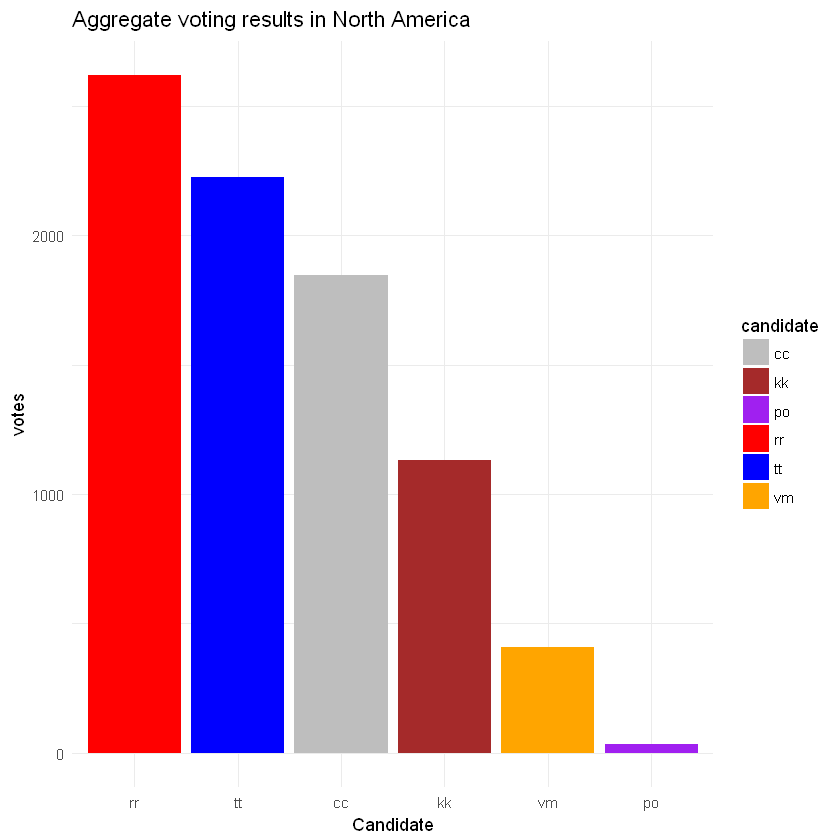

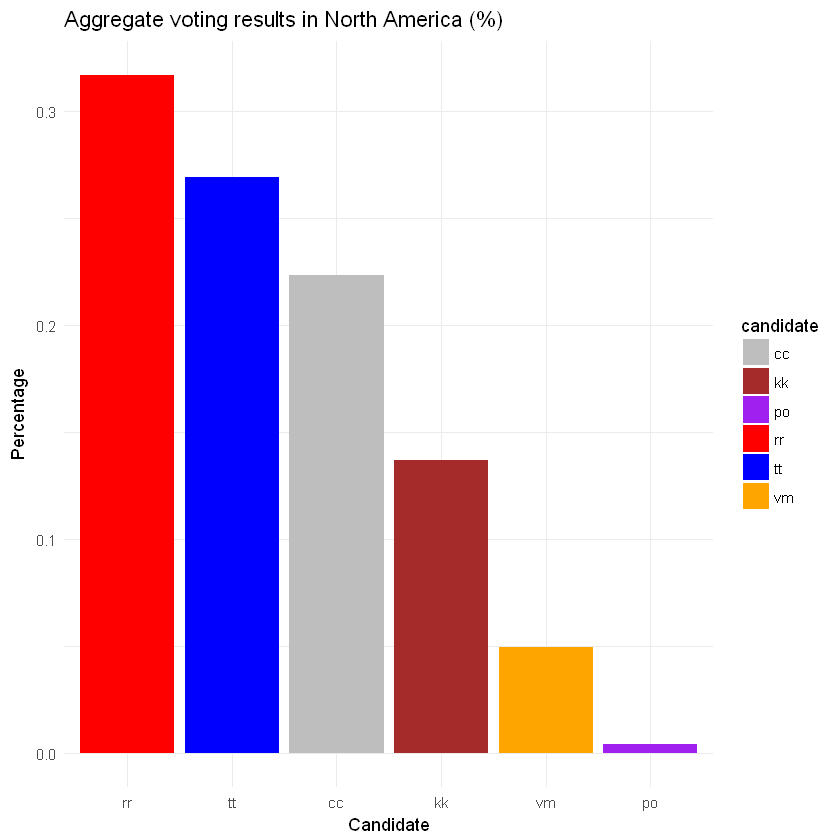

In [77]:
NoAm <- c("US", "Canada")

NAM.result <- as.data.frame(colSums(ballots.df[which(ballots.df$country %in% NoAm), 7:12]))
NAM.result$Candidate <- rownames(NAM.result)
colnames(NAM.result) <- c("votes", "candidate")

# Number of votes cast in Western Europe
num_votes.NAM <- colSums(NAM.result[1])
paste0("Total number of votes cast in North America: ", num_votes.NAM)

# Percent of votes cast in Western Europe over all votes outside Bulgaria and Turkey
perc_NAM.woT <- sprintf("%.1f%%", (num_votes.NAM/num_votes.woT)*100)
paste("Share of votes cast in North America over all votes outside Bulgaria and Turkey: ", perc_NAM.woT)

# Calculate percentage results
NAM.result$votes_perc <- NAM.result$votes/num_votes.NAM
NAM.result

# Bar plot of the number of ballots
ggplot(NAM.result, aes(y=votes, x=reorder(candidate, -votes), fill=candidate)) +
   geom_bar(stat="identity") + 
   scale_fill_manual(values=c('grey', 'brown', 'purple', 'red', 'blue', 'orange'))+theme_minimal() +
   labs(title="Aggregate voting results in North America", x="Candidate")

# Bar plot - percentage of votes within North America
ggplot(NAM.result, aes(y=votes_perc, x=reorder(candidate, -votes_perc), fill=candidate)) +
   geom_bar(stat="identity") + 
   scale_fill_manual(values=c('grey', 'brown', 'purple', 'red', 'blue', 'orange'))+theme_minimal() +
   labs(title="Aggregate voting results in North America (%)", x="Candidate", y="Percentage")


The voting pattern in North America differs from that in Western Europe in two major ways:

1) The Pro-Western candidate (TT) ranks 2nd with a non-trivial lead over the status quo candidate (CC), who ranks 3rd.

2) The nationalist candidate (KK) and the independent candidate (VM) are doing much worse.

Next, we will dig down at the voting section level.

### Histogram of candidates' performance based on rank

We will now focus on the three main candidates - RR, CC, and TT. We will create a histogram showing in how many sections each ranked as number 1, number 2, etc. Then, we will zero in on the sections where the pro-Western candidate, TT, ranked first. 

In [143]:
# We have already calculated rank by section in Part II
dim(ballots.df)
str(ballots.df)

[1] 325  27

'data.frame':	325 obs. of  27 variables:
 $ X           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ section.id  : int  320100003 320100001 320100004 320100005 320100002 320200012 320200006 320200007 320200013 320200302 ...
 $ country     : chr  "Australia" "Australia" "Australia" "Australia" ...
 $ city        : chr  "Brisbane" "Canberra" "Melbourne" "Perth" ...
 $ valid       : int  45 40 115 81 148 122 608 761 558 505 ...
 $ protest     : int  2 1 3 9 8 13 32 61 35 30 ...
 $ tt          : int  14 3 45 30 60 23 149 243 177 154 ...
 $ rr          : int  13 17 13 11 22 19 100 141 112 89 ...
 $ cc          : int  4 11 24 11 16 24 112 107 75 77 ...
 $ kk          : int  7 0 22 7 10 14 71 82 66 72 ...
 $ vm          : int  4 1 1 2 8 19 51 43 28 28 ...
 $ po          : int  0 0 0 0 1 0 20 11 4 7 ...
 $ valid.net   : int  43 39 112 72 140 109 576 700 523 475 ...
 $ tt.perc     : num  0.3256 0.0769 0.4018 0.4167 0.4286 ...
 $ rr.perc     : num  0.302 0.436 0.116 0.153 0.157 ...
 $ cc.perc     : num  0

In [195]:
# Again, we will exclude sections in Turkey
rank.df <- ballots.df[which(ballots.df$country!="Turkey"), c(2:4, 22:24)]
head(rank.df)
dim(rank.df)
rank.df <- melt(rank.df, id.vars=c("section.id", "country", "city"), variable.name="candidate", value.name="rank")
head(rank.df)

,section.id,country,city,tt.rank,rr.rank,cc.rank
1,320100003,Australia,Brisbane,1,2,4
2,320100001,Australia,Canberra,3,1,2
3,320100004,Australia,Melbourne,1,4,2
4,320100005,Australia,Perth,1,2,2
5,320100002,Australia,Sidney,1,2,3
6,320200012,Austria,Bregenz,2,3,1


[1] 290   6

,section.id,country,city,candidate,rank
1,320100003,Australia,Brisbane,tt.rank,1
2,320100001,Australia,Canberra,tt.rank,3
3,320100004,Australia,Melbourne,tt.rank,1
4,320100005,Australia,Perth,tt.rank,1
5,320100002,Australia,Sidney,tt.rank,1
6,320200012,Austria,Bregenz,tt.rank,2


Warning message:
: Ignoring unknown parameters: binwidth, bins, pad

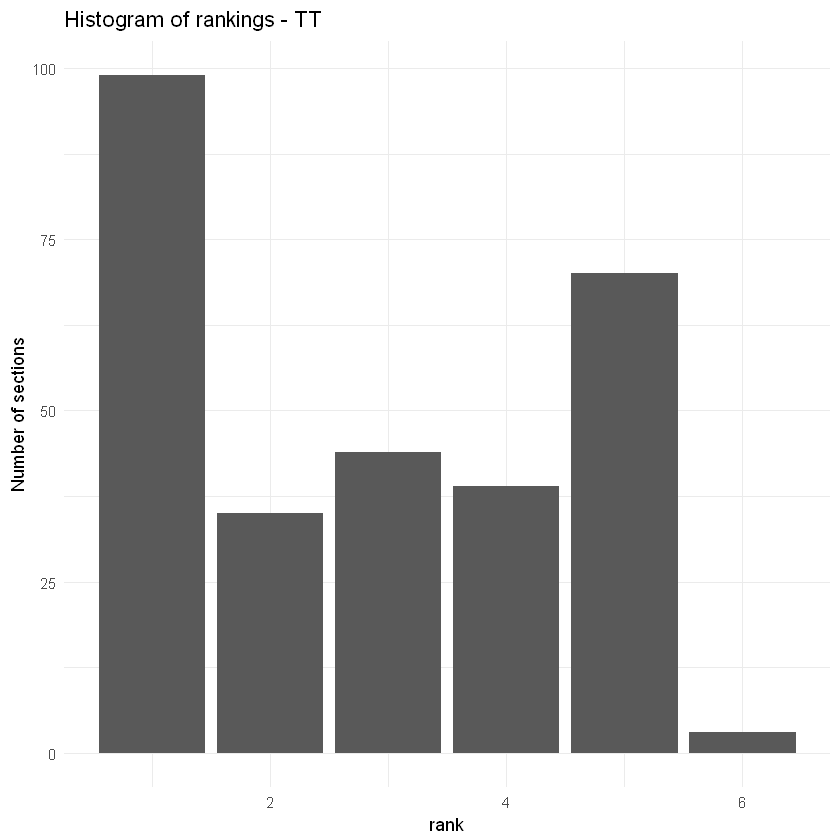

In [196]:
ggplot(rank.df[which(rank.df$candidate=="tt.rank"),], aes(x=rank))+ geom_histogram(stat="count") +
   theme_minimal() + labs(title="Histogram of rankings - TT", y="Number of sections")

Warning message:
: Ignoring unknown parameters: binwidth, bins, pad

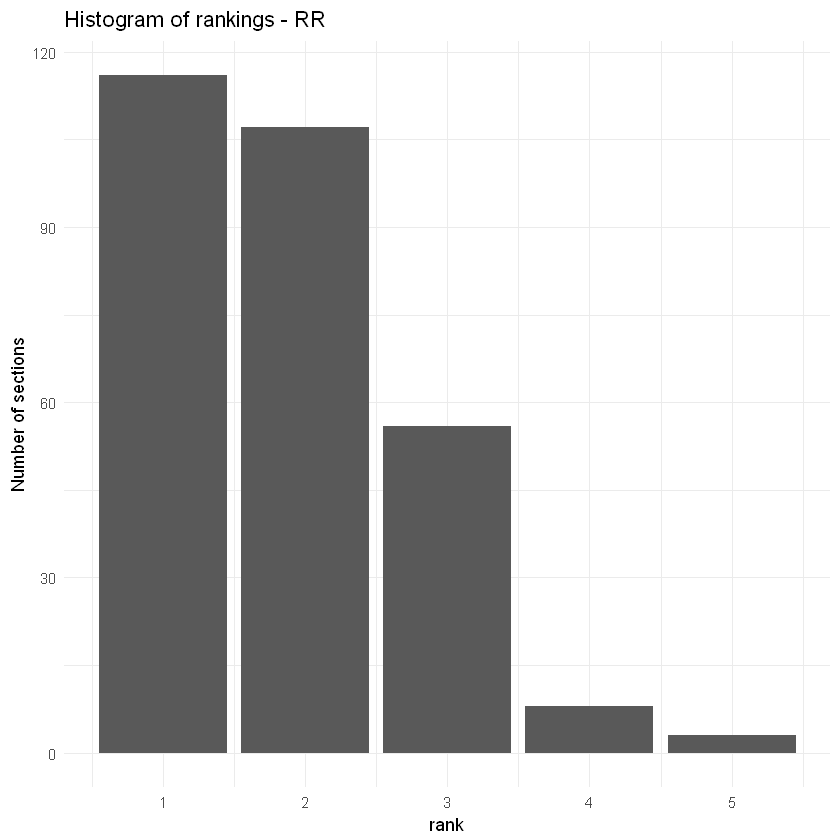

In [197]:
ggplot(rank.df[which(rank.df$candidate=="rr.rank"),], aes(x=rank))+ geom_histogram(stat="count") +
   theme_minimal() + labs(title="Histogram of rankings - RR", y="Number of sections")

Warning message:
: Ignoring unknown parameters: binwidth, bins, pad

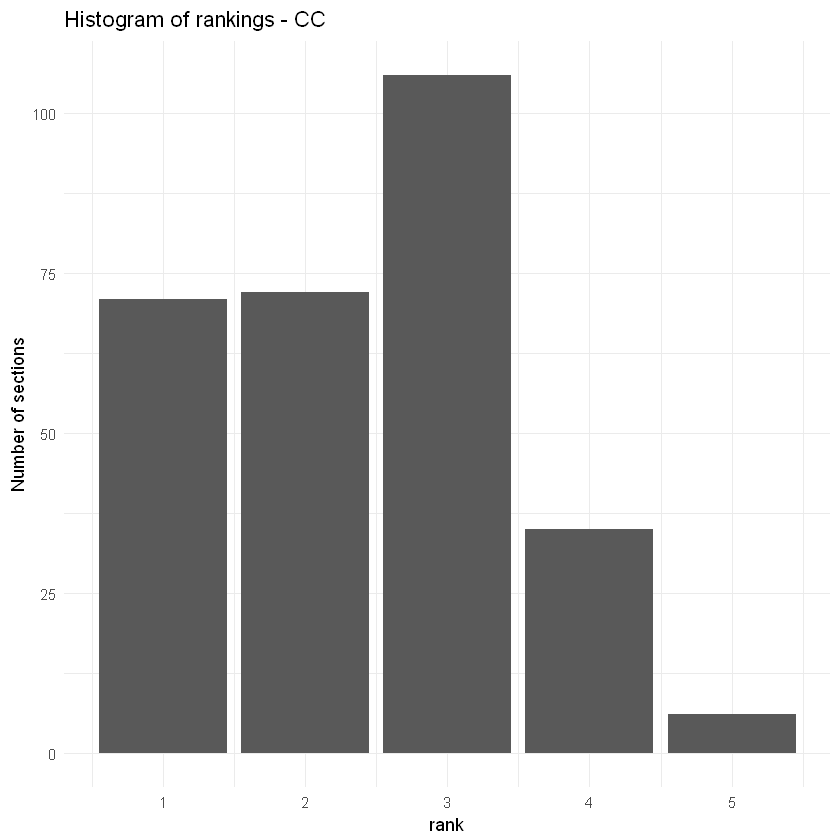

In [198]:
ggplot(rank.df[which(rank.df$candidate=="cc.rank"),], aes(x=rank))+ geom_histogram(stat="count") +
   theme_minimal() + labs(title="Histogram of rankings - CC", y="Number of sections")

Looking at the histograms above, we see that:

1) TT collected the highest number of votes in close to 100 of the 325 sections abroad. However, given his overall 3rd place, we would expect that he ranked 1st in smaller sections. Also, his second most frequent ranking was 5, which would indicate that he was either a polarizing candiate or that he was not well known in certain communities. 

2) RR ranked 1st or 2nd in over 200 of the sections. This observation is consistent with his overall result as the candidate with the highest number of votes. 

3) CC was most likely to be ranked 3rd. Recall that we limited the data to exclude Turkey. If results from Turkey were included, CC would have a much higher number of sections where she would rank 1st. 

### Where TT did best

We will now drill down and see in which sections TT did best. 

In [218]:
tt.df <- data.frame(ballots.df$country, ballots.df$city, ballots.df$tt.perc, ballots.df$tt.rank, ballots.df$valid)
colnames(tt.df) <- c("country", "city", "tt.perc", "tt.rank", "num_valid_votes")
tt.df <- tt.df[order(-tt.df$tt.perc), ]
head(tt.df, 50)

,country,city,tt.perc,tt.rank,num_valid_votes
196,Korea,Seul,0.617647058823529,1,35
241,Singapore,Sinapore,0.584415584415584,1,79
325,Japan,Tokyo,0.507246376811594,1,74
230,US,San Francisco,0.477941176470588,1,143
82,Vietnam,Hanoi,0.461538461538462,1,14
5,Australia,Sidney,0.428571428571429,1,148
221,US,New York,0.428571428571429,1,159
319,Switzerland,Lausanne,0.426086956521739,1,125
4,Australia,Perth,0.416666666666667,1,81
218,US,Los Angeles,0.411167512690355,1,209


In [222]:
head(tt.df[which(tt.df$country=="US"), ], 50)

,country,city,tt.perc,tt.rank,num_valid_votes
230,US,San Francisco,0.477941176470588,1,143
221,US,New York,0.428571428571429,1,159
218,US,Los Angeles,0.411167512690355,1,209
234,US,Sunnyvale,0.373271889400922,1,230
229,US,San Diego,0.359712230215827,1,146
239,US,Chicago,0.354609929078014,1,143
207,US,Boston,0.350877192982456,1,477
228,US,San Antonio,0.342105263157895,1,79
225,US,Pittsburg,0.338235294117647,1,73
240,US,Irvine,0.33112582781457,1,155
